In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift, fft
from seaborn import heatmap

sfreq = 250

ch_names = ["Fp1","Fp2","F3","F4","Cz","C3","C4","P3","P4","O1","O2"]

channels = "standard_1020"

In [19]:
df = pd.read_csv('eegrunt-obci-ovibe-test-data.csv')
df.head()

,Time (s),Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11
0,0.0,-0.000706,-0.000650,-0.000118,0.000173,-0.000170,-0.000356,0.000075,-0.000294,0.000001,0.000018,-0.000092
1,0.0,1.044487,0.672550,1.654474,1.757170,2.020262,0.858115,1.127149,1.104597,0.000008,0.000115,-0.000591
2,0.0,6.313815,4.124584,10.540387,12.081149,13.331629,5.951727,7.291828,7.551271,-0.721999,-2.165719,-0.723859
3,0.0,16.604105,11.101502,29.121404,36.228929,37.521751,18.118274,20.392596,22.634737,-4.165826,-12.496846,-4.170031
4,0.0,25.009502,17.153844,45.299937,61.175410,57.660764,31.292267,31.663772,38.527985,-10.639291,-31.916651,-10.647424


In [20]:
df.shape

(15360, 12)

<AxesSubplot:>

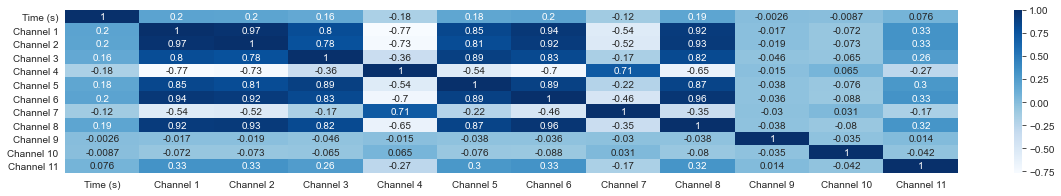

In [36]:
corr = df.corr()
heatmap(corr, cmap="Blues", annot=True)

In [22]:
channel_1 = df['Channel 1']
time = df['Time (s)']

In [23]:
channel_1_array = channel_1.to_numpy()
time_array = time.to_numpy()

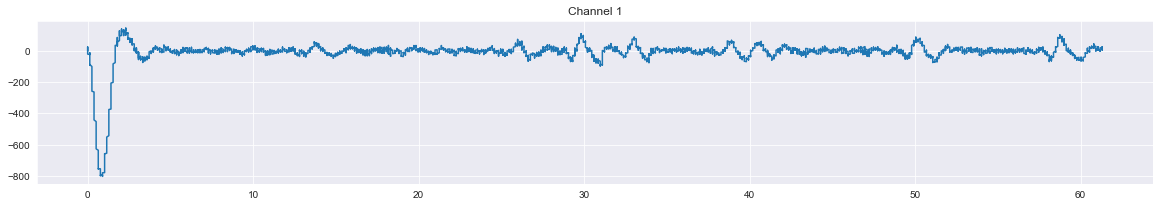

In [24]:
plt.title("Channel 1")
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(time_array, channel_1_array)

plt.show()

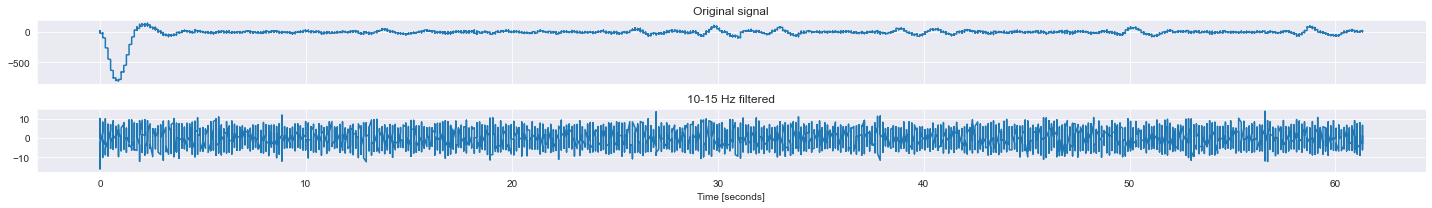

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(time_array, channel_1_array)
ax1.set_title('Original signal')
sos = signal.butter(10, 15, 'hp', fs=250, output='sos')
filtered = signal.sosfilt(sos, channel_1_array)
ax2.plot(time_array, filtered)
ax2.set_title('10-15 Hz filtered')
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

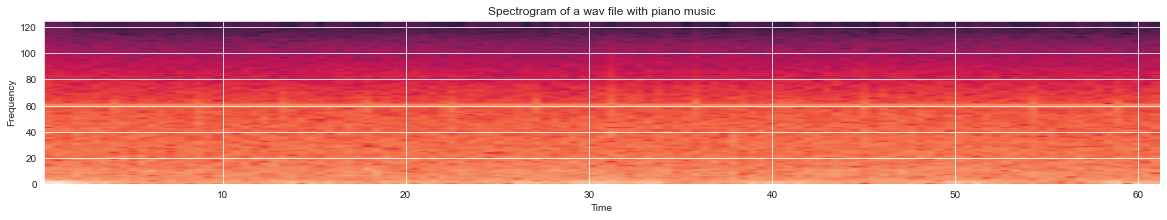

In [26]:
plt.title('Spectrogram of a wav file with piano music')
plt.specgram(channel_1_array, Fs=250)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

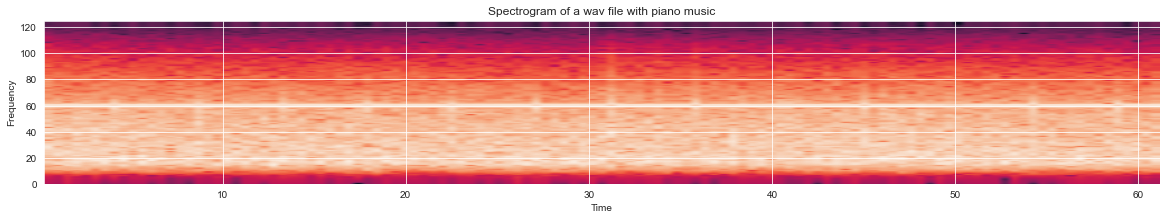

In [27]:
plt.title('Spectrogram of a wav file with piano music')
plt.specgram(filtered, Fs=250)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

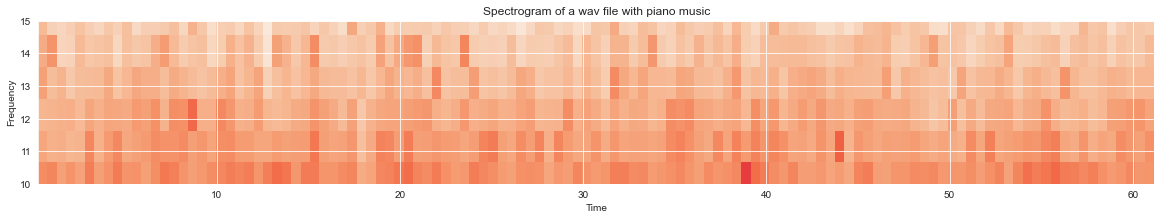

In [28]:
plt.title('Spectrogram of a wav file with piano music')
plt.specgram(filtered, Fs=250)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.axis(ymin=10, ymax=15)
plt.show()

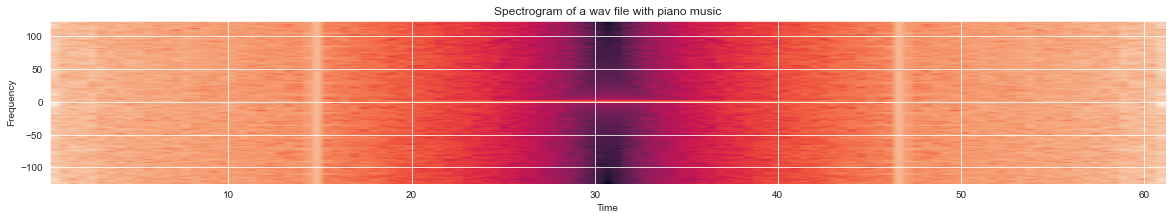

In [29]:
fft_signal = fft(channel_1_array)

plt.title('Spectrogram of a wav file with piano music')
plt.specgram(fft_signal, Fs=250)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

/Users/damirnurtdinov/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


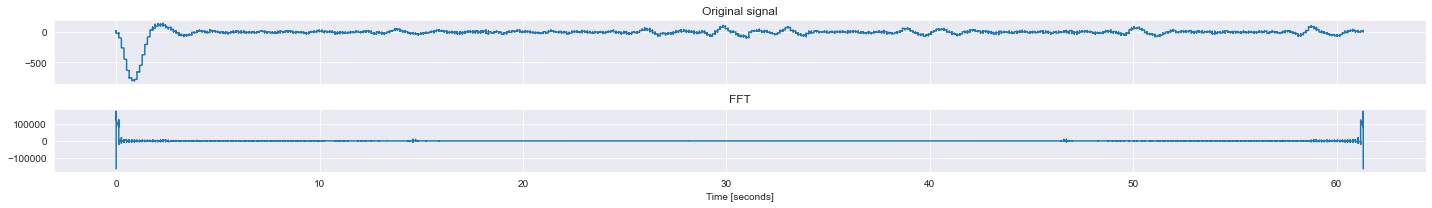

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(time_array, channel_1_array)
ax1.set_title('Original signal')
sos = signal.butter(10, 15, 'hp', fs=250, output='sos')
filtered = signal.sosfilt(sos, channel_1_array)
ax2.plot(time_array, fft_signal)
ax2.set_title('FFT')
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

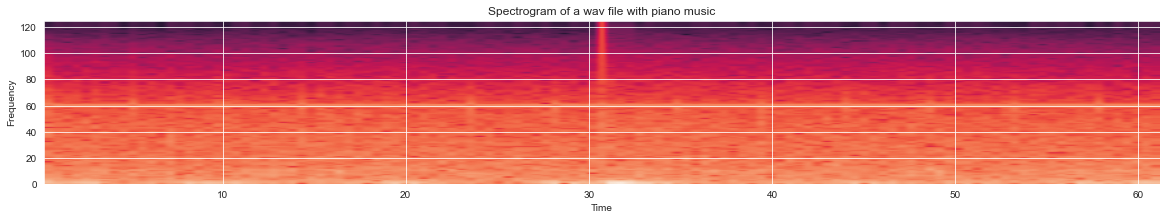

In [31]:
fftshift_signal = fftshift(channel_1_array)

plt.title('Spectrogram of a wav file with piano music')
plt.specgram(fftshift_signal, Fs=250)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

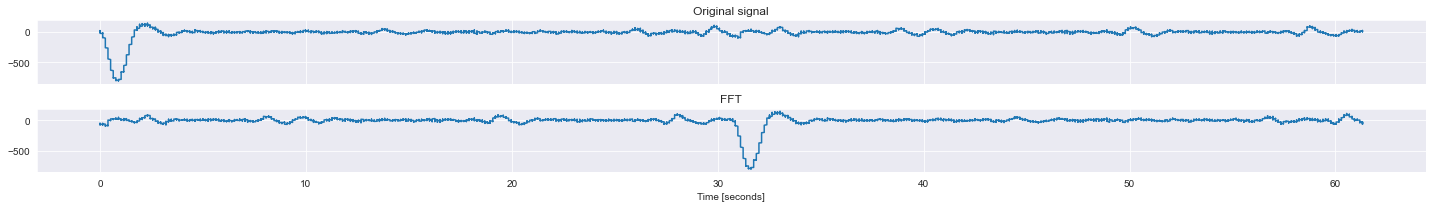

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(time_array, channel_1_array)
ax1.set_title('Original signal')
sos = signal.butter(10, 15, 'hp', fs=250, output='sos')
filtered = signal.sosfilt(sos, channel_1_array)
ax2.plot(time_array, fftshift_signal)
ax2.set_title('FFT')
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

<ipython-input-33-1fdbbee46829>:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=5).
  plt.specgram(cwtmatr, Fs=250)


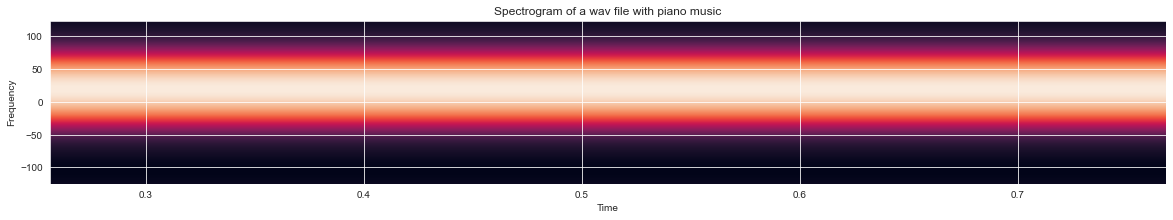

In [33]:
widths = np.arange(10, 15)
cwtmatr = signal.cwt(channel_1_array, signal.morlet2, widths)

plt.title('Spectrogram of a wav file with piano music')
plt.specgram(cwtmatr, Fs=250)
plt.xlabel('Time')
plt.ylabel('Frequency')
#plt.axis(ymin=10, ymax=15)
plt.show()

In [34]:
cwtmatr.shape

(5, 15360)

* https://en.wikipedia.org/wiki/Neural_oscillation
* https://www.sciencedirect.com/science/article/abs/pii/S0925231211003158
* https://www.intechopen.com/chapters/74032